[![Open in SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/<your-org>/<your-repo-name>/blob/<your-branch-name>/<path-to-your-notebook>/<your-notebook.ipynb>)

Adding seaborn to do some visualizations of the data:

In [ ]:
%pip install seaborn

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('EatenByBearData.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   64000 non-null  object 
 1   age                    64000 non-null  int64  
 2   birthDate              64000 non-null  object 
 3   distanceFromZoo        64000 non-null  int64  
 4   meatObjectsWorn        64000 non-null  int64  
 5   honeyRatio             64000 non-null  float64
 6   height                 64000 non-null  int64  
 7   weight                 64000 non-null  int64  
 8   combatTraining         64000 non-null  bool   
 9   hasBearSpray           64000 non-null  bool   
 10  numberofPicnicBaskets  64000 non-null  int64  
 11  runningSpeed           64000 non-null  float64
 12  colorsWorn             64000 non-null  object 
 13  eatenByBear            64000 non-null  bool   
dtypes: bool(3), float64(2), int64(6), object(3)
memory usa

,name,age,birthDate,distanceFromZoo,meatObjectsWorn,honeyRatio,height,weight,combatTraining,hasBearSpray,numberofPicnicBaskets,runningSpeed,colorsWorn,eatenByBear
0,Ernesto Spooner,5,2008-05-25,612,5,0.74,105,23,True,False,1,5.077637,"black, white, orange",False
1,Linda Lebovic,87,1984-05-31,158,9,0.20,97,391,False,True,0,6.519645,"white, yellow, orange",True
2,Harry Tinker,46,1977-06-02,302,5,0.02,31,290,False,False,2,1.419160,"blue, yellow, white",True
3,Tyrone Greathouse,98,2020-05-22,510,4,0.39,56,1273,False,True,2,1.479784,"orange, yellow, purple",False
4,Jenny Heald,70,2001-05-27,549,7,0.75,46,1124,True,False,2,5.398538,"purple, white, cyan",False


In [3]:
sum(df.duplicated())
df.drop_duplicates(inplace=True)

In [4]:
df[['colorOne', 'colorTwo', 'colorThree']] = df['colorsWorn'].str.split(',', expand=True)

In [5]:
df[['colorOne', 'colorTwo', 'colorThree']] = df[['colorOne', 'colorTwo', 'colorThree']].apply(lambda x: x.astype('category'))

In [6]:
df.combatTraining = df.combatTraining.replace({True: 1, False: 0})
df.hasBearSpray = df.hasBearSpray.replace({True: 1, False: 0})
df.eatenByBear = df.eatenByBear.replace({True: 1, False: 0})

In [7]:
df.drop(['name', 'birthDate', 'colorsWorn', ], axis=1, inplace=True, errors='ignore')

In [8]:
df["colorOne"] = df["colorOne"].cat.codes
df["colorTwo"] = df["colorTwo"].cat.codes
df["colorThree"] = df["colorThree"].cat.codes

In [9]:
df.head()

,age,distanceFromZoo,meatObjectsWorn,honeyRatio,height,weight,combatTraining,hasBearSpray,numberofPicnicBaskets,runningSpeed,eatenByBear,colorOne,colorTwo,colorThree
0,5,612,5,0.74,105,23,1,0,1,5.077637,0,0,8,5
1,87,158,9,0.20,97,391,0,1,0,6.519645,1,8,9,5
2,46,302,5,0.02,31,290,0,0,2,1.419160,1,1,9,8
3,98,510,4,0.39,56,1273,0,1,2,1.479784,0,5,9,6
4,70,549,7,0.75,46,1124,1,0,2,5.398538,0,6,8,2


In [10]:
X = df.iloc[:,df.columns != 'eatenByBear']
y = df.eatenByBear

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

In [12]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

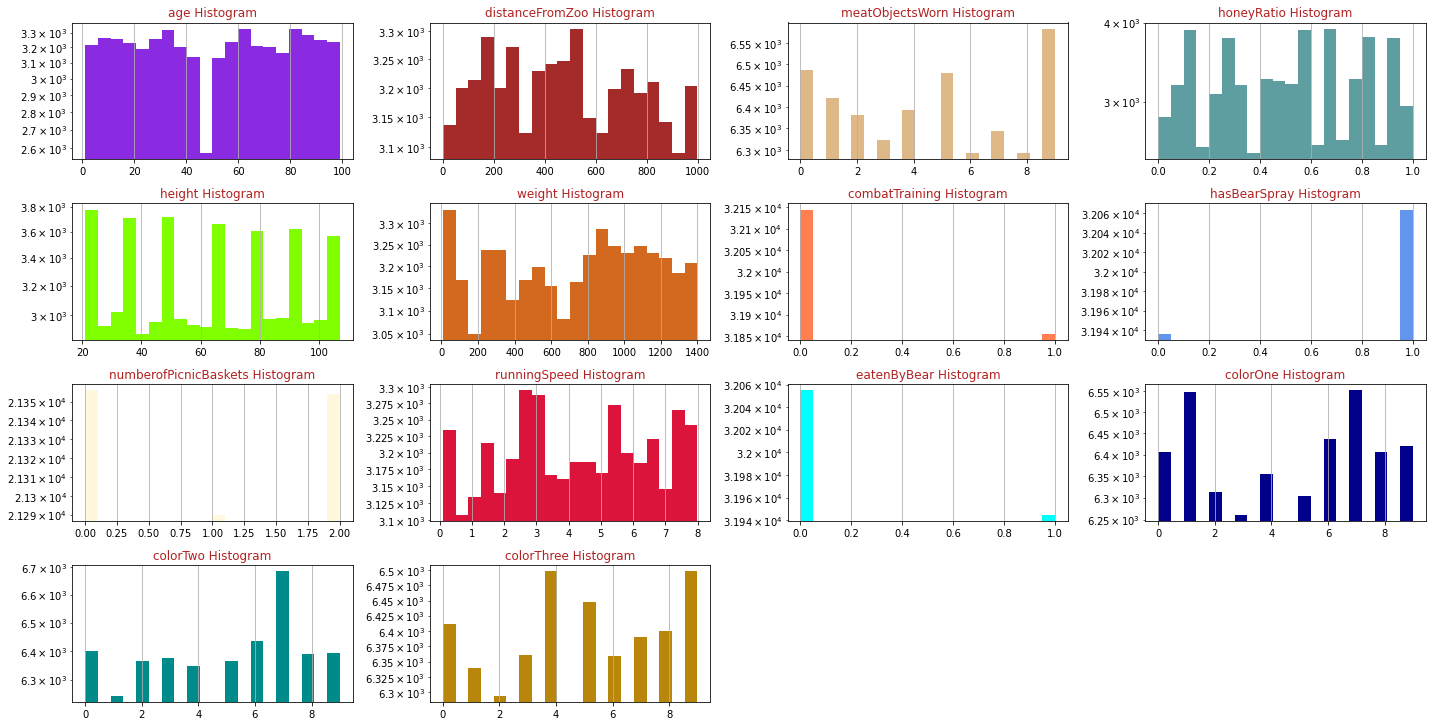

In [13]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

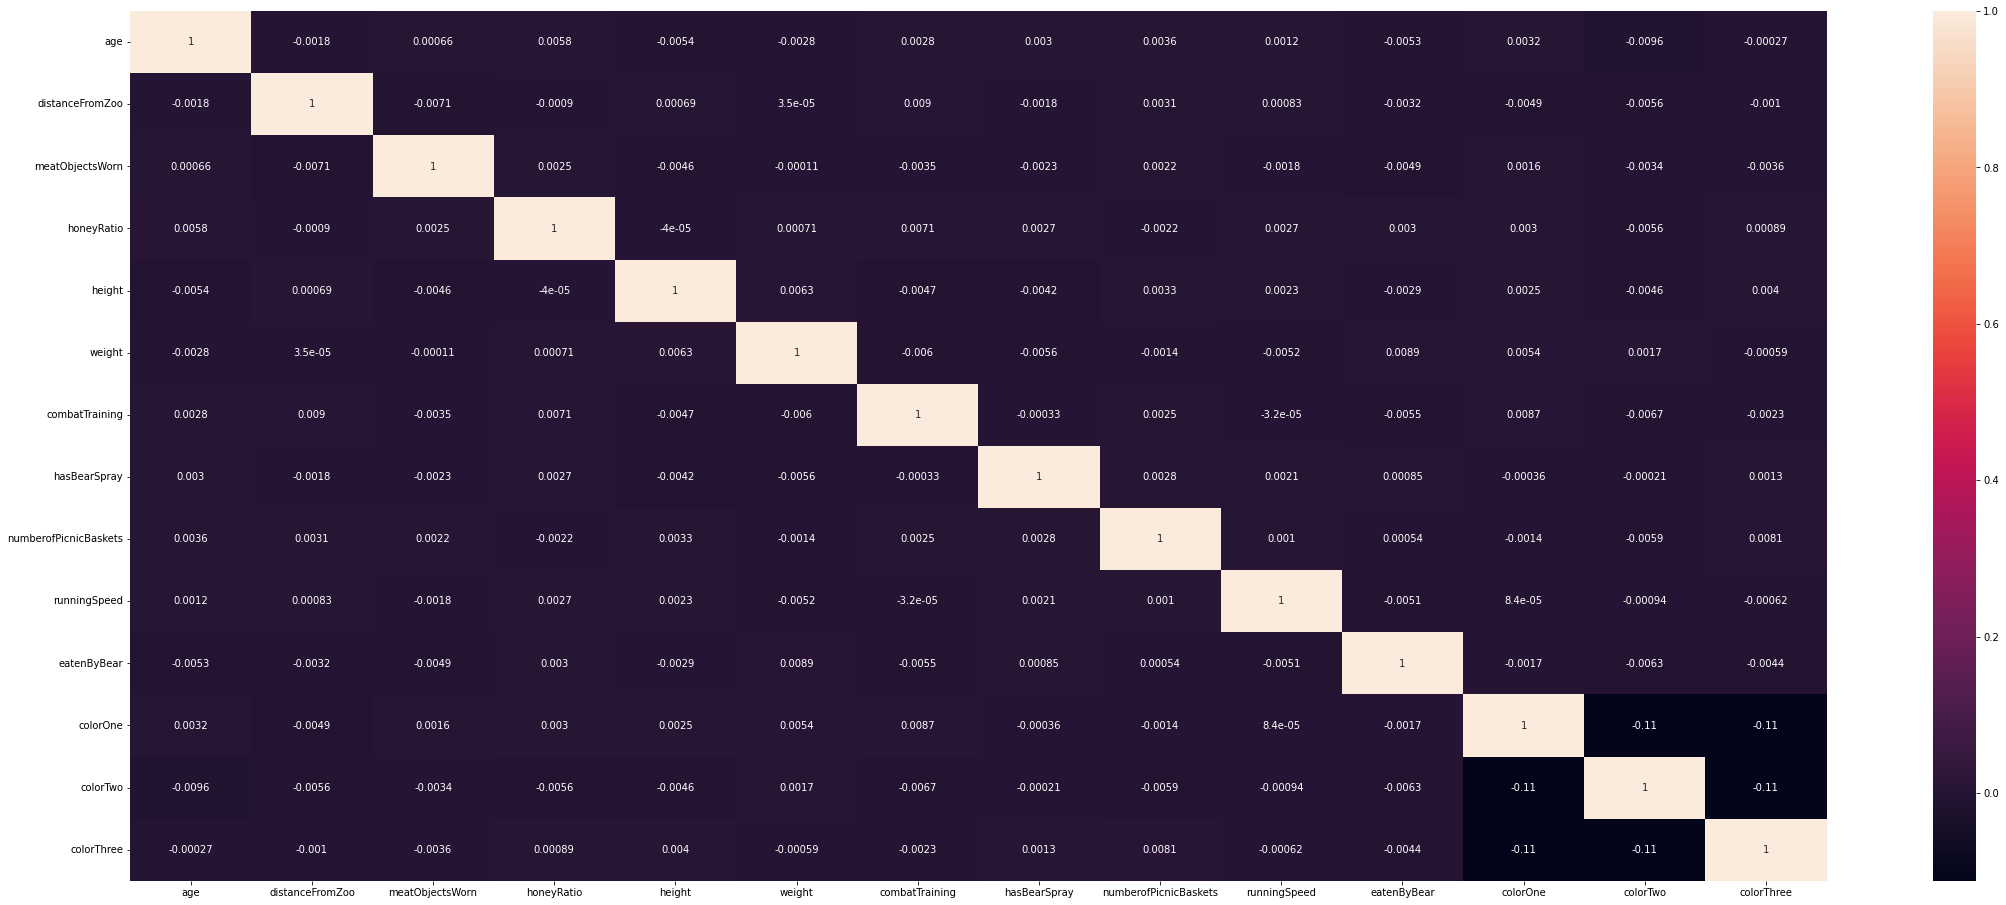

In [14]:
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 50.81250000000001


In [20]:
y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 50.0859375


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.15      0.23      6411
           1       0.50      0.85      0.63      6389

    accuracy                           0.50     12800
   macro avg       0.50      0.50      0.43     12800
weighted avg       0.50      0.50      0.43     12800



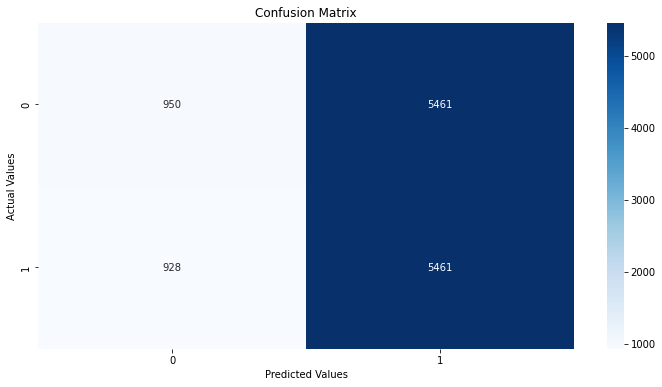

In [22]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')